![title.png](ML_07_title.png)

# Agenda

### 1. Entropy
### 2. Mutual Information
### 3. Decision Trees for classification
### 4. Random Forest for classification
### 5. Ensemble learning
### 6. Confusion Matrix
### 7. Sensitivity and Specificity
### 8. Bias and Variance


## 1. Machine Learning Fundamentals: Entropy

Entropy is a measure of uncertainty or randomness in a system. It is calculated as:

$$ H(X) = - \sum_{i=1}^{n} P(x_i) \log_2 P(x_i) $$

where $ P(x_i) $ is the probability of class $ x_i $. Lower entropy indicates a purer node.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Precompute entropy curve
p_values = np.linspace(0, 1, 100)
entropies = [- (p*np.log2(p) + (1-p)*np.log2(1-p)) if 0 < p < 1 else 0 for p in p_values]

def visualize_entropy(count_A):
    total = 100
    count_B = total - count_A
    p = count_A / total
    H = entropy(p)
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Left: Distribution bar chart
    axes[0].bar(['Class A', 'Class B'], [count_A, count_B], color=['blue', 'orange'])
    axes[0].set_ylim(0, total)
    axes[0].set_title(f'Distribution\\nEntropy={H:.3f}')
    
    # Right: Entropy curve with current point
    axes[1].plot(p_values, entropies, color='green')
    axes[1].scatter([p], [H], color='red', s=100, label=f'p={p:.2f}')
    axes[1].set_title('Entropy Curve')
    axes[1].set_xlabel('p (proportion of Class A)')
    axes[1].set_ylabel('Entropy')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

interact(visualize_entropy, count_A=IntSlider(min=0, max=100, step=1, value=50, description='Class A count'));

interactive(children=(IntSlider(value=50, description='Class A count'), Output()), _dom_classes=('widget-inter…

### Information Gain

Information Gain measures the reduction in uncertainty (entropy) about the target variable $ Y $ after splitting on a feature $ A $.

$$
IG(Y, A) = H(Y) - H(Y|A)
$$

Where:
- $ H(Y) = -\sum_{i} p(y_i) \log p(y_i) $ is the entropy of the target before the split.
- $ H(Y|A) = \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v) $ is the weighted entropy of the subsets after the split.

**Interpretation:** Higher Information Gain means the feature provides more information about the target and is a better candidate for splitting.


Parent entropy: 0.971
Entropy after split: 0.846
Information Gain: 0.125


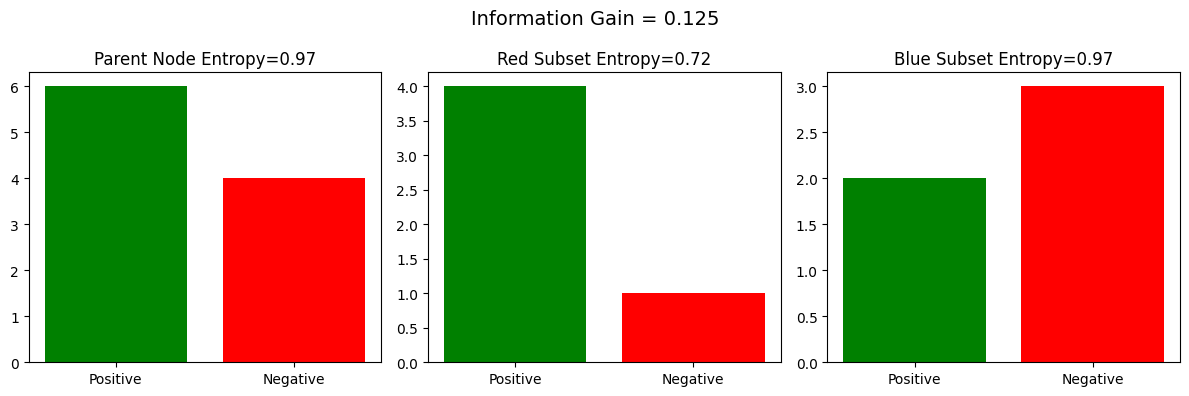

In [7]:

import numpy as np
import matplotlib.pyplot as plt

# Function to compute entropy
def entropy(p):
    return -np.sum([pi * np.log2(pi) for pi in p if pi > 0])

# Initial dataset: 6 positive, 4 negative
total_pos, total_neg = 6, 4
H_parent = entropy([total_pos/10, total_neg/10])

# Split on Color feature
# Red subset: 4 positive, 1 negative
# Blue subset: 2 positive, 3 negative
red_pos, red_neg = 4, 1
blue_pos, blue_neg = 2, 3

H_red = entropy([red_pos/5, red_neg/5])
H_blue = entropy([blue_pos/5, blue_neg/5])

# Weighted entropy after split
weighted_entropy = (5/10)*H_red + (5/10)*H_blue

info_gain = H_parent - weighted_entropy

print(f"Parent entropy: {H_parent:.3f}")
print(f"Entropy after split: {weighted_entropy:.3f}")
print(f"Information Gain: {info_gain:.3f}")

# Visualization
fig, ax = plt.subplots(1, 3, figsize=(12,4))

# Bar chart for initial distribution
ax[0].bar(['Positive','Negative'], [total_pos, total_neg], color=['green','red'])
ax[0].set_title(f'Parent Node Entropy={H_parent:.2f}')

# Red subset
ax[1].bar(['Positive','Negative'], [red_pos, red_neg], color=['green','red'])
ax[1].set_title(f'Red Subset Entropy={H_red:.2f}')

# Blue subset
ax[2].bar(['Positive','Negative'], [blue_pos, blue_neg], color=['green','red'])
ax[2].set_title(f'Blue Subset Entropy={H_blue:.2f}')

plt.suptitle(f"Information Gain = {info_gain:.3f}", fontsize=14)
plt.tight_layout()
plt.show()



## 2. Machine Learning Fundamentals: Mutual Information

Mutual Information (MI) quantifies the amount of information obtained about one random variable through another. It is defined as:

$$ I(X; Y) = \sum_{x,y} P(x,y) \log \left( \frac{P(x,y)}{P(x)P(y)} \right) $$

It helps in feature selection by identifying how much knowing a feature reduces uncertainty about the target variable.

**Real-world application:** Used in feature selection for classification problems.


In decision trees, **Information Gain** when splitting on a feature \( A \) is:

$$
IG(Y, A) = H(Y) - H(Y|A)
$$

where:

- $ H(Y) $: Entropy of the target before the split
- $ H(Y|A) $: Conditional entropy after splitting by feature \( A \)

This is exactly the **mutual information** between \( Y \) (target) and \( A \) (feature):

$$
I(Y; A) = H(Y) - H(Y|A)
$$

So, **choosing the feature with maximum Information Gain is equivalent to choosing the feature with the highest Mutual Information with the target**.


             Feature  Mutual Information
2  petal length (cm)            0.992046
3   petal width (cm)            0.983456
0  sepal length (cm)            0.485945
1   sepal width (cm)            0.213035


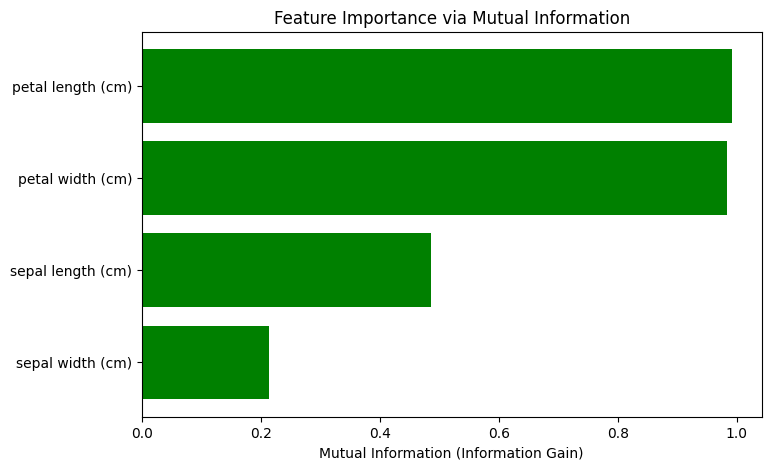

In [12]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Compute mutual information (equivalent to info gain for discrete splits)
mi_scores = mutual_info_classif(X, y, discrete_features=False)

# Show as DataFrame
mi_df = pd.DataFrame({'Feature': feature_names, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values('Mutual Information', ascending=False)

print(mi_df)

# Visualization
plt.figure(figsize=(8, 5))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='green')
plt.xlabel('Mutual Information (Information Gain)')
plt.title('Feature Importance via Mutual Information')
plt.gca().invert_yaxis()
plt.show()


### Gini Index

The **Gini Index** (or Gini Impurity) measures the impurity of a dataset. It is commonly used in decision trees (CART algorithm) as an alternative to entropy.

#### Formula:
For a node with class probabilities $ p_1, p_2, \dots, p_k $:
$$
\text{Gini} = 1 - \sum_{i=1}^{k} p_i^2
$$

- **Range:**  
    - $ 0 $: Perfectly pure node (all samples in one class)  
    - Maximum near $ 0.5 $ for binary classification when classes are balanced  

#### Intuition:
It represents the probability of **misclassifying a randomly chosen element** if it is labeled according to the class distribution in the node.

**Example:**  
For binary classification with $ p_1 = 0.6, p_2 = 0.4 $:  
$$
\text{Gini} = 1 - (0.6^2 + 0.4^2) = 0.48
$$


In [18]:
def gini(counts):
    total = sum(counts)
    return 1 - sum((c/total)**2 for c in counts)

# Example: Node with 6 positives and 4 negatives
counts = [6, 4]
print("Gini:", gini(counts))

# Compare with entropy
import math
def entropy(counts):
    total = sum(counts)
    return -sum((c/total) * math.log2(c/total) for c in counts if c > 0)

print("Entropy:", entropy(counts))


Gini: 0.48
Entropy: 0.9709505944546686


#### Question time!


# 3. Decision Tree Intuition

Decision Trees split data recursively based on the feature that provides the maximum information gain (or minimum Gini index). Each internal node represents a feature, and each leaf node represents a class label.

In [28]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

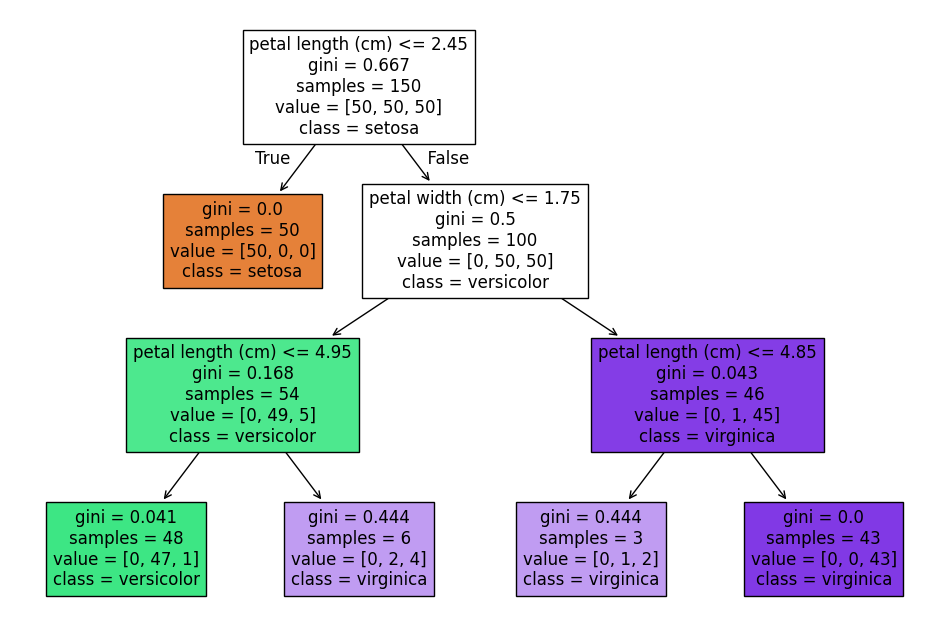

In [63]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X, y = iris.data, iris.target

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


## 4. Random Forest Intuition

Random Forest is an ensemble of decision trees. It uses bagging and feature randomness to create a collection of trees whose predictions are averaged (for regression) or voted (for classification).

### What Does Feature Randomness Mean?

In **Random Forest**, *feature randomness* refers to the idea that:

- When building each decision tree:
    - At **each split**, the algorithm does **not** consider **all features** for the best split.
    - Instead, it **randomly selects a subset of features** (often:
        - $\sqrt{d}$ for classification
        - $d/3$ for regression  
        where $ d $ = total number of features).
    - The best split is chosen **only from this subset**.

---

### **Why?**
- Reduces correlation between trees.
- Promotes diversity in the ensemble, which is crucial for bagging to work effectively.
- Helps prevent overfitting and improves generalization.

---

### **Example**
- Suppose you have 50 features.
- At a node, instead of evaluating all 50, Random Forest might randomly choose:
    - $\sqrt{50} \approx 7$ features.
- The best split among these 7 is applied.
- At the next node, another random subset is chosen.


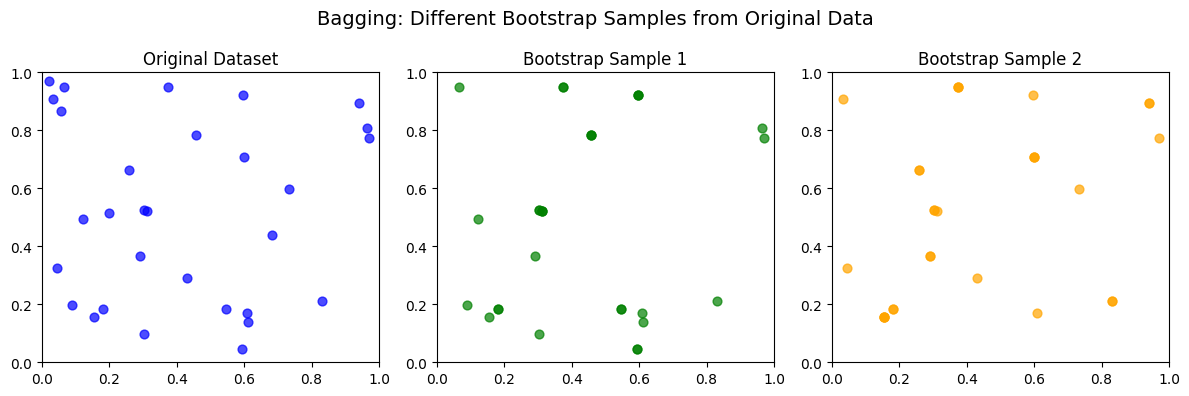

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic dataset
np.random.seed(42)
X = np.random.rand(30, 2)  # 30 points in 2D

# Bootstrap samples
idx1 = np.random.choice(range(30), size=30, replace=True)
idx2 = np.random.choice(range(30), size=30, replace=True)

sample1 = X[idx1]
sample2 = X[idx2]

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Original dataset
axes[0].scatter(X[:, 0], X[:, 1], color='blue', s=40, alpha=0.7)
axes[0].set_title('Original Dataset')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)

# Bootstrap sample 1
axes[1].scatter(sample1[:, 0], sample1[:, 1], color='green', s=40, alpha=0.7)
axes[1].set_title('Bootstrap Sample 1')
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)

# Bootstrap sample 2
axes[2].scatter(sample2[:, 0], sample2[:, 1], color='orange', s=40, alpha=0.7)
axes[2].set_title('Bootstrap Sample 2')
axes[2].set_xlim(0, 1)
axes[2].set_ylim(0, 1)

plt.suptitle("Bagging: Different Bootstrap Samples from Original Data", fontsize=14)
plt.tight_layout()
plt.show()


### How Does Voting Work in Random Forest?

After all trees are trained in the Random Forest, their predictions are combined to make the final prediction using **ensemble aggregation**:

---

#### **For Classification:**
Each tree outputs a predicted **class label** for a sample.  
The Random Forest predicts the class that receives the **majority vote**:

$$
\hat{y} = \text{mode}\{ h_1(x), h_2(x), \dots, h_n(x) \}
$$

Where:
- $ h_i(x) $ is the prediction of the $ i^{th} $ tree.
- $ \hat{y} $ is the final class predicted by the forest.

---

#### **Why Voting/Averaging Works**
- Each decision tree is a **high-variance, low-bias** model.
- Combining them via majority vote (classification) or averaging (regression):
    - **Reduces variance**
    - Improves stability and generalization.


**Real-world application:** Has niche uses where sample size is small-ish and overfitting risk is significant, e.g.: classification in finance (credit scoring). Reason: It’s robust, interpretable, and requires less hyperparameter tuning, overall a strong baseline. Boosted trees yield better performance as a general rule (better at addressing high bias).


#### Question time!

# 5. Ensemble Learning

Ensemble Learning combines multiple models to improve performance. Common techniques include bagging, boosting, and stacking.


### Boosting and Stacking

#### Boosting
Boosting is an **ensemble technique** that builds models **sequentially**, where each new model focuses on correcting the errors of the previous ones.

- **Key Idea:** Combine many **weak learners** (often shallow decision trees) into a strong learner.
- Each subsequent model gives **more weight** to the samples that were misclassified by earlier models.

**Popular Boosting Algorithms:**
- **AdaBoost**: Adjusts sample weights after each iteration.
- **Gradient Boosting**: Fits new models on the residual errors using gradient descent.
- **XGBoost, LightGBM, CatBoost**: Highly optimized implementations widely used in competitions.

**Mathematical Idea (Gradient Boosting):**
$$
F_{m}(x) = F_{m-1}(x) + \eta \cdot h_m(x)
$$
Where:
- $ F_{m}(x) $: Model at iteration $ m $
- $ h_m(x) $: Weak learner (decision tree)
- $ \eta $: Learning rate

**Where is it used?**
- **Structured/tabular data**: Often outperforms Random Forests.
- State-of-the-art in **Kaggle competitions**.

---

#### Stacking
Stacking (Stacked Generalization) is an **ensemble method** that combines predictions of multiple different models using a **meta-model**.

- **Process:**
    1. Train multiple base models (e.g., Random Forest, Logistic Regression, Gradient Boosting).
    2. Collect their predictions.
    3. Use these predictions as features to train a **meta-learner** (often a simple linear model).

**Goal:** Leverage strengths of diverse models to improve overall performance.

**Mathematical Representation:**
$$
\hat{y} = g\big(f_1(x), f_2(x), \dots, f_k(x)\big)
$$
Where:
- $ f_1, f_2, \dots, f_k $: Base models
- $ g $: Meta-model

**Where is it used?**
- **Competitions and production systems** where small performance gains matter.
- Useful when different models capture different aspects of the data.

---

### **Key Difference**
- **Boosting**: Sequentially reduces errors of previous models (dependency between models).
- **Stacking**: Combines diverse models in parallel, then learns how to mix their outputs optimally.


In [45]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, n_clusters_per_class=2, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimators
base_estimators = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Define meta-model (stacker)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Stacking Classifier
stack_clf = StackingClassifier(estimators=base_estimators, final_estimator=meta_model, cv=5)

# Train models
for clf in [e[1] for e in base_estimators]:
    clf.fit(X_train, y_train)

stack_clf.fit(X_train, y_train)

# Evaluate performance
print("Base Models Accuracy:")
for name, clf in base_estimators:
    y_pred = clf.predict(X_test)
    print(f"{name}: {accuracy_score(y_test, y_pred):.3f}")

# Stacking classifier performance
stack_pred = stack_clf.predict(X_test)
print(f"\nStacking Classifier Accuracy: {accuracy_score(y_test, stack_pred):.3f}")

Base Models Accuracy:
lr: 0.837
svc: 0.950
rf: 0.917

Stacking Classifier Accuracy: 0.960


**Real-world application:** Frequently used to win in Kaggle competitions (competitive machine learning), overall great approach to classification

#### Question time!


# 6. Machine Learning Fundamentals: Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification model by showing correct and incorrect predictions for each class.

$$
\begin{bmatrix}
TP & FP \\
FN & TN
\end{bmatrix}
$$


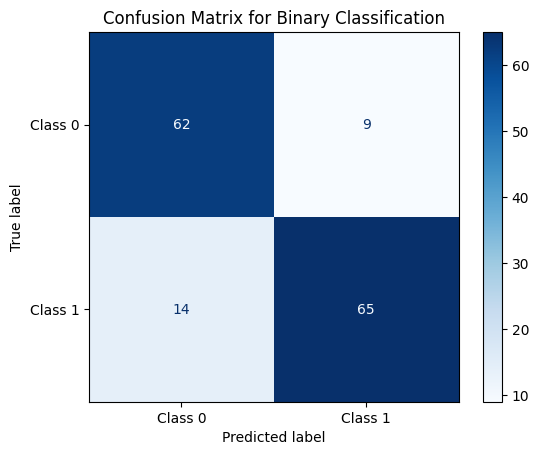

In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create binary classification dataset
X, y = make_classification(n_samples=500, n_features=10, n_classes=2, 
                           n_informative=5, n_redundant=0, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression classifier
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Binary Classification")
plt.show()


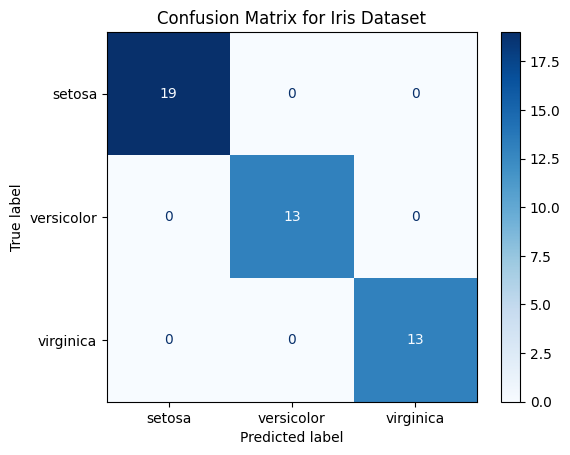

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression classifier
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm3 = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Iris Dataset")
plt.show()



# 7. Machine Learning Fundamentals: Sensitivity and Specificity

- **Sensitivity (Recall):** Measures how many actual positives are correctly identified.
$$ \text{Sensitivity} = \frac{TP}{TP + FN} $$

- **Specificity:** Measures how many actual negatives are correctly identified.
$$ \text{Specificity} = \frac{TN}{TN + FP} $$


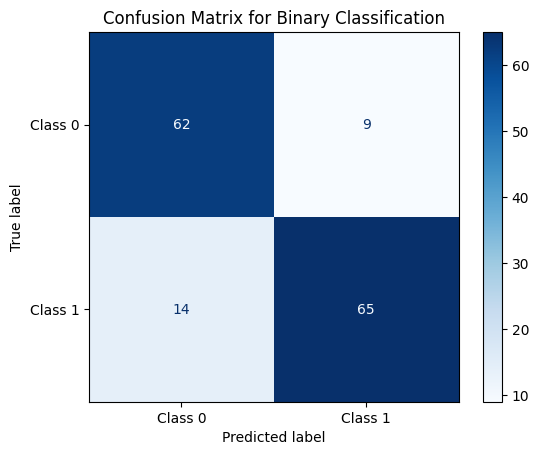

Sensitivity: 0.82, Specificity: 0.87


In [56]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Binary Classification")
plt.show()

TP = cm[1,1]
FN = cm[1,0]
TN = cm[0,0]
FP = cm[0,1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print(f"Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}")

### Example 1: Sensitivity is Most Important
**Context:** Medical screening for a life-threatening disease (e.g., cancer).  
- **Goal:** Detect as many actual positive cases as possible.
- **Reason:** Missing a positive case (False Negative) could be fatal, while a False Positive only leads to extra tests.
- **Metric Focus:** Maximize **Sensitivity**, even at the cost of more False Positives.

---

### Example 2: Specificity is Most Important
**Context:** Fraud detection in financial transactions where investigations are expensive.  
- **Goal:** Avoid flagging legitimate transactions as fraud (reduce False Positives).
- **Reason:** Investigating false alarms wastes time and resources.
- **Metric Focus:** Maximize **Specificity**, even if some fraud cases are missed.


# 8. Machine Learning Fundamentals: Bias and Variance

- **Bias:** Error from overly simplistic assumptions in the learning algorithm.
- **Variance:** Error from too much complexity, causing the model to capture noise.


![title.png](bias-variance2.jpg)

![title.png](bias-variance.jpg)

![title.png](ML_05_last.png)